In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torchvision import datasets, transforms
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten input
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [31]:
def load_mnist(batch_size=64):
    transform = transforms.ToTensor()
    train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

    train_loader = data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

In [32]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):

    loss_values = []  # List to store the loss at each epoch
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        loss_values.append(avg_loss)  # Store average loss per epoch
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # Plotting the loss over epochs
    plt.plot(range(1, num_epochs + 1), loss_values, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Function Over Epochs')
    plt.legend()
    plt.show()


In [33]:
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

Training on MNIST
Epoch [1/8], Loss: 0.2919
Epoch [2/8], Loss: 0.1248
Epoch [3/8], Loss: 0.0848
Epoch [4/8], Loss: 0.0612
Epoch [5/8], Loss: 0.0464
Epoch [6/8], Loss: 0.0354
Epoch [7/8], Loss: 0.0284
Epoch [8/8], Loss: 0.0213


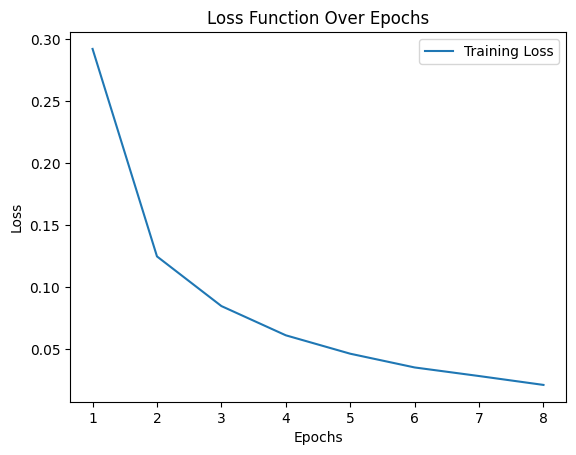

Accuracy of the model on the test images: 97.92%


In [34]:
if __name__ == '__main__':
    print("Training on MNIST")
    train_loader, test_loader = load_mnist()

    input_size = 28*28
    hidden_size = 256
    num_classes = 10
    learning_rate = 0.001

    mnist_model = MLP(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(mnist_model.parameters(), lr=learning_rate)

    train_model(mnist_model, train_loader, criterion, optimizer, num_epochs=8)
    test_model(mnist_model, test_loader)
